In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import csv
from matplotlib import cm
from matplotlib.lines import Line2D
from scipy.special import comb
import itertools as it


def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return it.chain.from_iterable(it.combinations(s, r) for r in range(len(s)+1))


plt.rcParams.update({'font.size': 7})
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams["xtick.major.size"] = 2
plt.rcParams["ytick.major.size"] = 2
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["ytick.major.width"] = 0.5

def _label(s, mut_lookat, fixed):
    for a in fixed:
        if s[a-1] != fixed[a]:
            return np.nan#"empty"
    lab = ""
    for a in mut_lookat:
        if s[a-1] == "1":
            lab += f"{a},"
    if lab == "":
        lab = "-"
    else:
        lab = lab[:-1]
    return lab


In [20]:
antibody = "9114"
mut_names = ['30','35','36','57','64','65','66','79','82','83','84','85','92','95','103','113']

antigens = ["H1", "H3", "FluB"] 
L = 16 
df = pd.read_csv("../../Figure2/20210430_fdl_9114.csv", dtype={"variant":"str"})
df

,variant,repa_x,repb_x,repc_x,H1_log10Kd,H1_stelog10Kd,repa_y,repb_y,repc_y,H3_log10Kd,...,mutation_9,mutation_10,mutation_11,mutation_12,mutation_13,mutation_14,mutation_15,mutation_16,fdl_x,fdl_y
0,1001110010000101,9.502127,9.499467,9.452164,-9.484586,0.011476,6.000000,6.000000,6.000000,-6.000000,...,True,False,False,False,False,True,False,True,-177.829041,149.142075
1,0001111110011011,9.526711,9.446817,9.319445,-9.430991,0.042677,6.000000,6.000000,6.000000,-6.000000,...,True,False,False,True,True,False,True,True,-47.672573,186.740356
2,1111110010011111,9.522475,9.556415,9.412129,-9.497006,0.030798,6.719267,6.789486,6.699885,-6.736213,...,True,False,False,True,True,True,True,True,-173.239792,143.431946
3,1011111110101110,9.520731,9.557455,9.420888,-9.499691,0.028852,6.000000,6.000000,6.000000,-6.000000,...,True,False,True,False,True,True,True,False,-194.518494,138.719116
4,1111101010000111,9.346955,9.398311,9.396946,-9.380737,0.011947,6.000000,6.000000,6.000000,-6.000000,...,True,False,False,False,False,True,True,True,-204.532776,191.004181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,0000100010110100,NaN,NaN,NaN,NaN,NaN,6.000000,6.000000,NaN,-6.000000,...,True,False,True,True,False,True,False,False,NaN,NaN
65532,0010100000110110,NaN,NaN,NaN,NaN,NaN,6.000000,6.000000,NaN,-6.000000,...,False,False,True,True,False,True,True,False,NaN,NaN
65533,0010100010111000,NaN,NaN,NaN,NaN,NaN,6.000000,6.000000,6.000000,-6.000000,...,True,False,True,True,True,False,False,False,NaN,NaN
65534,0010100110001000,NaN,NaN,NaN,NaN,NaN,6.000000,6.000000,6.000000,-6.000000,...,True,False,False,False,True,False,False,False,NaN,NaN


## Figure 3 -- Figure Supplement 1A

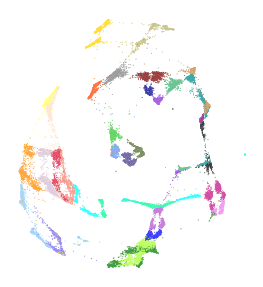

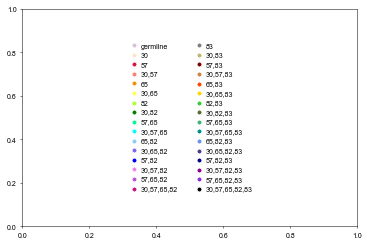

In [7]:
# color the landscape by the 5 focal mutations

mutation_lookat = [1,4,6,9,10]
fixed_mutations = {} 

namedict = {'-':'germline','1':'30','4':'57','6':'65','9':'82','10':'83'}

order = ['-','1','4','1,4','6','1,6','9','1,9','4,6','1,4,6','6,9','1,6,9','4,9','1,4,9','4,6,9','1,4,6,9',
        '10','1,10','4,10','1,4,10','6,10','1,6,10','9,10','1,9,10','4,6,10','1,4,6,10','6,9,10','1,6,9,10','4,9,10','1,4,9,10','4,6,9,10','1,4,6,9,10']
labels = [','.join([namedict[i] for i in x.split(',')]) for x in order]

colordict = {'gray':'#808080','darkolivegreen':'#556b2f','maroon2':'#7f0000','darkslateblue':'#483d8b',
            'green':'#008000','mediumseagreen':'#3cb371','darkkhaki':'#bdb76b','peru':'#cd853f',
             'lightseagreen':'#20b2aa','darkblue':'#00008b','limegreen':'#32cd32','darkmagenta':'#8b008b',
             'maroon3':'#b03060','orangered':'#ff4500','darkorange':'#ff8c00','lime':'#00ff00',
             
             'mediumspringgreen':'#00fa9a','blueviolet':'#8a2be2','crimson':'#dc143c','blue':'#0000ff',
             'greenyellow':'#adff2f','thistle':'#d8bfd8','fuchsia':'#ff00ff','salmon':'#fa8072',
             'laserlemon':'#ffff54','cornflower':'#6495ed','deeppink':'#ff1493','mediumslateblue':'#7b68ee',
             'violet':'#ee82ee','lightskyblue':'#87cefa','aquamarine':'#7fffd4','bisque':'#ffe4c4',
            
            'gold':'gold','mediumorchid':'mediumorchid','black':'black','mediumvioletred':'mediumvioletred',
            'cyan':'cyan','darkcyan':'darkcyan'}

palette = ['thistle','bisque','crimson','salmon',
           'darkorange','laserlemon','greenyellow','green',
            'mediumspringgreen','cyan','lightskyblue','mediumslateblue',
           'blue','violet','mediumorchid','mediumvioletred',
             
            
            
            'gray','darkkhaki','maroon2','peru',
           'orangered','gold','limegreen','darkolivegreen',
            'mediumseagreen','darkcyan','cornflower','darkslateblue',
           'darkblue','darkmagenta','blueviolet','black'
            
            ]


hue = [_label(s, mutation_lookat, fixed_mutations) for s in df.variant]

plt.figure(figsize=(4,4)) 
ax = plt.subplot(111)
sns.scatterplot(x=-1.0*df.fdl_x, y=-1.0*df.fdl_y, 
                hue=hue, s=1, 
                ax=ax,palette=[colordict[x] for x in palette],hue_order=order,edgecolors='none',legend=None)

ax.set_aspect('equal')
ax.set_axis_off()

plt.tight_layout()
plt.savefig('images/landscape_focal5.png',dpi=300)
plt.show()


legend_elements = []
for i in range(len(order)):
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=labels[i],
                                  markerfacecolor=colordict[palette[i]], markersize=5))

fig, ax = plt.subplots()
legendfig = ax.legend(handles=legend_elements, loc='center',ncol=2,framealpha=1, frameon=False,
                      fontsize=7,handletextpad=0)

plt.show()


def export_legend(legend, filename):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, bbox_inches=bbox,transparent=True)

export_legend(legendfig,'images_supp/landscape_focal5_leg.pdf')



## Figure 3 -- Figure Supplement 2

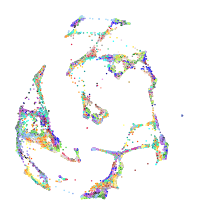

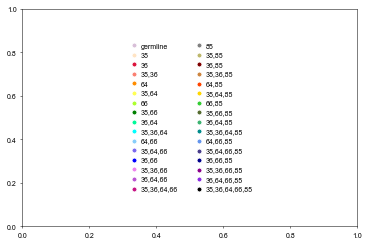

In [10]:
# now get 5 other mutations


mutation_lookat = [2,3,5,7,12]

fixed_mutations = {} 

namedict = {'-':'germline','2':'35','3':'36','5':'64','7':'66','12':'85'}

muts = [str(x) for x in mutation_lookat]

order = ['-',muts[0],muts[1],muts[0]+','+muts[1],
         muts[2],muts[0]+','+muts[2],muts[3],muts[0]+','+muts[3],
         muts[1]+','+muts[2],muts[0]+','+muts[1]+','+muts[2],muts[2]+','+muts[3],muts[0]+','+muts[2]+','+muts[3],
         muts[1]+','+muts[3],muts[0]+','+muts[1]+','+muts[3],muts[1]+','+muts[2]+','+muts[3],muts[0]+','+muts[1]+','+muts[2]+','+muts[3],
        muts[4],muts[0]+','+muts[4],muts[1]+','+muts[4],muts[0]+','+muts[1]+','+muts[4],
         muts[2]+','+muts[4],muts[0]+','+muts[2]+','+muts[4],muts[3]+','+muts[4],muts[0]+','+muts[3]+','+muts[4],
         muts[1]+','+muts[2]+','+muts[4],muts[0]+','+muts[1]+','+muts[2]+','+muts[4],muts[2]+','+muts[3]+','+muts[4],muts[0]+','+muts[2]+','+muts[3]+','+muts[4],
         muts[1]+','+muts[3]+','+muts[4],muts[0]+','+muts[1]+','+muts[3]+','+muts[4],muts[1]+','+muts[2]+','+muts[3]+','+muts[4],muts[0]+','+muts[1]+','+muts[2]+','+muts[3]+','+muts[4]]

labels = [','.join([namedict[i] for i in x.split(',')]) for x in order]

palette = ['thistle','bisque','crimson','salmon',
           'darkorange','laserlemon','greenyellow','green',
            'mediumspringgreen','cyan','lightskyblue','mediumslateblue',
           'blue','violet','mediumorchid','mediumvioletred',
             
            
            
            'gray','darkkhaki','maroon2','peru',
           'orangered','gold','limegreen','darkolivegreen',
            'mediumseagreen','darkcyan','cornflower','darkslateblue',
           'darkblue','darkmagenta','blueviolet','black'
            
            ]



hue = [_label(s, mutation_lookat, fixed_mutations) for s in df.variant]

plt.figure(figsize=(5,3)) 
ax = plt.subplot(111)
sns.scatterplot(x=-1.0*df.fdl_x, y=-1.0*df.fdl_y, 
                hue=hue, s=2, 
                ax=ax,palette=[colordict[x] for x in palette],hue_order=order,edgecolors='none',legend=None)

ax.set_aspect('equal')

ax.set_axis_off()
plt.tight_layout()
plt.savefig('images/landscape_minor5.png',dpi=300)
plt.show()

legend_elements = []
for i in range(len(order)):
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=labels[i],
                                  markerfacecolor=colordict[palette[i]], markersize=5))

fig, ax = plt.subplots()
legendfig = ax.legend(handles=legend_elements, loc='center',ncol=2,framealpha=1, frameon=False,
                      fontsize=7,handletextpad=0)

plt.show()


def export_legend(legend, filename):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, bbox_inches=bbox,transparent=True)

export_legend(legendfig,'images_supp/landscape_minor5_leg.pdf')




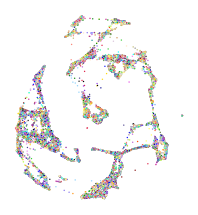

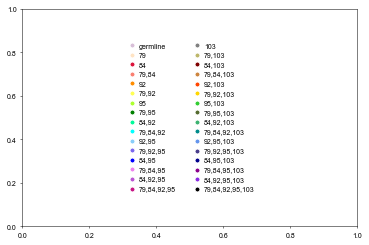

In [13]:
# now get 5 neutral mutations

mutation_lookat = [8,11,13,14,15]

fixed_mutations = {} #9:"0",10:"0"} #6:"0",

namedict = {'-':'germline','8':'79','11':'84','13':'92','14':'95','15':'103'}

muts = [str(x) for x in mutation_lookat]

order = ['-',muts[0],muts[1],muts[0]+','+muts[1],
         muts[2],muts[0]+','+muts[2],muts[3],muts[0]+','+muts[3],
         muts[1]+','+muts[2],muts[0]+','+muts[1]+','+muts[2],muts[2]+','+muts[3],muts[0]+','+muts[2]+','+muts[3],
         muts[1]+','+muts[3],muts[0]+','+muts[1]+','+muts[3],muts[1]+','+muts[2]+','+muts[3],muts[0]+','+muts[1]+','+muts[2]+','+muts[3],
        muts[4],muts[0]+','+muts[4],muts[1]+','+muts[4],muts[0]+','+muts[1]+','+muts[4],
         muts[2]+','+muts[4],muts[0]+','+muts[2]+','+muts[4],muts[3]+','+muts[4],muts[0]+','+muts[3]+','+muts[4],
         muts[1]+','+muts[2]+','+muts[4],muts[0]+','+muts[1]+','+muts[2]+','+muts[4],muts[2]+','+muts[3]+','+muts[4],muts[0]+','+muts[2]+','+muts[3]+','+muts[4],
         muts[1]+','+muts[3]+','+muts[4],muts[0]+','+muts[1]+','+muts[3]+','+muts[4],muts[1]+','+muts[2]+','+muts[3]+','+muts[4],muts[0]+','+muts[1]+','+muts[2]+','+muts[3]+','+muts[4]]

labels = [','.join([namedict[i] for i in x.split(',')]) for x in order]

palette = ['thistle','bisque','crimson','salmon',
           'darkorange','laserlemon','greenyellow','green',
            'mediumspringgreen','cyan','lightskyblue','mediumslateblue',
           'blue','violet','mediumorchid','mediumvioletred',
             
            
            
            'gray','darkkhaki','maroon2','peru',
           'orangered','gold','limegreen','darkolivegreen',
            'mediumseagreen','darkcyan','cornflower','darkslateblue',
           'darkblue','darkmagenta','blueviolet','black'
            
            ]



hue = [_label(s, mutation_lookat, fixed_mutations) for s in df.variant]

plt.figure(figsize=(5,3)) 
ax = plt.subplot(111)
sns.scatterplot(x=-1.0*df.fdl_x, y=-1.0*df.fdl_y, 
                hue=hue, s=2, 
                ax=ax,palette=[colordict[x] for x in palette],hue_order=order,edgecolors='none',legend=None)

ax.set_aspect('equal')

ax.set_axis_off()
plt.tight_layout()
plt.savefig('images/landscape_neutral5.png',dpi=300)
plt.show()

legend_elements = []
for i in range(len(order)):
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=labels[i],
                                  markerfacecolor=colordict[palette[i]], markersize=5))

fig, ax = plt.subplots()
legendfig = ax.legend(handles=legend_elements, loc='center',ncol=2,framealpha=1, frameon=False,
                      fontsize=7,handletextpad=0)

plt.show()


def export_legend(legend, filename):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, bbox_inches=bbox,transparent=True)

export_legend(legendfig,'images_supp/landscape_neutral5_leg.pdf')



## Figure 3 -- Figure Supplement 1B,C

In [4]:
num_mutations_H1 = 16
order_H1 = 5
num_term_list_H1 = np.array([int(comb(num_mutations_H1,i)) for i in range(1,order_H1+1)])
total_params_H1 = sum(num_term_list_H1)
order_start_indices_H1 = list(np.cumsum(num_term_list_H1)+1)
order_start_indices_H1.insert(0,1)
print(num_term_list_H1,total_params_H1)
print(order_start_indices_H1)

num_mutations_H3 = 13
order_H3 = 4
num_term_list_H3 = np.array([int(comb(num_mutations_H3,i)) for i in range(1,order_H3+1)])
total_params_H3 = sum(num_term_list_H3)
order_start_indices_H3 = list(np.cumsum(num_term_list_H3)+1)
order_start_indices_H3.insert(0,1)
print(num_term_list_H3,total_params_H3)
print(order_start_indices_H3)

ep_type = 'biochem'


[  16  120  560 1820 4368] 6884
[1, 17, 137, 697, 2517, 6885]
[ 13  78 286 715] 1092
[1, 14, 92, 378, 1093]


In [21]:
# read model coefficients


coefs_H1 = np.zeros(total_params_H1+1)
stderr_H1 = np.zeros(total_params_H1+1)
names_H1 = []
sig_H1 = np.full((total_params_H1+1),0)
cis_H1 = np.zeros((total_params_H1+1,2))

with open('../../../CR9114/Epistasis_linear_models/model_coefs/H1_'+str(order_H1)+'order_'+ep_type+'.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2_train = float(next(coef_reader)[-1])
    header = next(coef_reader)
    print(header)
    for i in range(total_params_H1+1):
        row = next(coef_reader)
        names_H1.append(row[0])
        coefs_H1[i] = float(row[1])
        if i >= 1:
            stderr_H1[i] = float(row[2])
            cis_H1[i,0] = float(row[4])
            cis_H1[i,1] = float(row[5])
            if float(row[4])*float(row[5]) > 0:
                sig_H1[i] = 1
    readfile.close()
            
print(len(coefs_H1))      

['Term', 'Coefficient', 'Standard Error', 'p-value', '95% CI lower', '95% CI upper']
6885


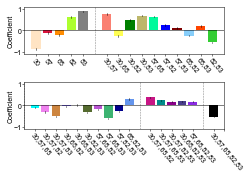

In [23]:
# plot coefficients

muts_to_consider = [1,4,6,9,10]

coefs = {}

for s in powerset(muts_to_consider):
    if len(s) >= 1: 
        name = ','.join([str(x) for x in s])
        coefs[name] = [coefs_H1[names_H1.index(name)],stderr_H1[names_H1.index(name)]]

namedict = {'-':'germline','1':'30','4':'57','6':'65','9':'82','10':'83'}
order = ['1','4','1,4','6','1,6','9','1,9','4,6','1,4,6','6,9','1,6,9','4,9','1,4,9','4,6,9','1,4,6,9',
        '10','1,10','4,10','1,4,10','6,10','1,6,10','9,10','1,9,10','4,6,10','1,4,6,10','6,9,10','1,6,9,10','4,9,10','1,4,9,10','4,6,9,10','1,4,6,9,10']
palette = ['bisque','crimson','salmon',
           'darkorange','laserlemon','greenyellow','green',
            'mediumspringgreen','cyan','lightskyblue','mediumslateblue',
           'blue','violet','mediumorchid','mediumvioletred',
             
            
            
            'gray','darkkhaki','maroon2','peru',
           'orangered','gold','limegreen','darkolivegreen',
            'mediumseagreen','darkcyan','cornflower','darkslateblue',
           'darkblue','darkmagenta','blueviolet','black'
            
            ]

palette_dict = dict(zip(order, palette))

new_order = ['1','4','6','9','10',
           '1,4','1,6','1,9','1,10','4,6','4,9','4,10','6,9','6,10','9,10',
        '1,4,6','1,4,9','1,4,10','1,6,9','1,6,10','1,9,10','4,6,9','4,6,10','4,9,10','6,9,10',
          '1,4,6,9','1,4,6,10','1,4,9,10','1,6,9,10','4,6,9,10',
          '1,4,6,9,10']

new_palette = [palette_dict[x] for x in new_order]
labels = [','.join([namedict[i] for i in x.split(',')]) for x in new_order]

xvals = list(range(36))
for i in [33,27,16,5]:
    xvals.pop(i)
    
width = 0.25

plt.rcParams.update({'font.size': 7})    

plt.figure(figsize=(3.5,2.5))

ax = plt.subplot(211)
for i in range(15):
    plt.bar(xvals[i],coefs[new_order[i]][0],zorder=1,color=colordict[new_palette[i]])
    plt.plot([xvals[i],xvals[i]],
             [coefs[new_order[i]][0]-coefs[new_order[i]][1],coefs[new_order[i]][0]+coefs[new_order[i]][1]],'k-',zorder=10,linewidth=0.5)

for i in [5,16,27,33]:
    plt.plot([i,i],[-1.5,1.5],linestyle='--',color='grey',linewidth=0.5)
plt.plot([-1,35],[0,0],'k-',linewidth=0.5)
plt.xticks(xvals,labels,rotation=-50,ha='left',rotation_mode="anchor")
plt.xlim([-1,16])
plt.ylabel('Coefficient',labelpad=0)
ax.tick_params(pad=1)
plt.ylim([-1.1,1.1])

ax2 = plt.subplot(212)
for i in range(15,len(new_order)):
    plt.bar(xvals[i],coefs[new_order[i]][0],zorder=1,color=colordict[new_palette[i]])
    plt.plot([xvals[i],xvals[i]],
             [coefs[new_order[i]][0]-coefs[new_order[i]][1],coefs[new_order[i]][0]+coefs[new_order[i]][1]],'k-',zorder=10,linewidth=0.5)

plt.xticks(xvals,labels,rotation=-50,ha='left',rotation_mode="anchor")
plt.ylabel('Coefficient',labelpad=0)
plt.xlim([16,35])
plt.ylim([-1.1,1.1])

for i in [5,16,27,33]:
    plt.plot([i,i],[-1.5,1.5],linestyle='--',color='grey',linewidth=0.5)

plt.plot([-1,35],[0,0],'k-',linewidth=0.5)
ax2.tick_params(pad=1)

plt.tight_layout()
plt.subplots_adjust(hspace=.6)
plt.savefig('images_supp/coefs_colored.pdf',dpi=300)
plt.show()

In [11]:
# get distribution of # of significant coefficients for all groups of 5 mutations

num_sig_all = []
# loop over all sets of 5 mutations
for i in it.combinations(list(range(1,17)),5):    
    num_sig = 0
    # get corresponding coefficients and count significance
    for s in powerset(i): 
        if len(s) >= 1:
            name = ','.join([str(x) for x in s])
            if cis_H1[names_H1.index(name)][0]*cis_H1[names_H1.index(name)][1] > 0:
                num_sig += 1
    num_sig_all.append(num_sig)
    if num_sig >= 29: print(i)

print(len(num_sig_all))




4368


[6, 8, 9, 4, 12, 10, 5, 5, 4, 4]
26
3.8120421245421245
0.00022893772893772894


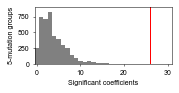

In [26]:
# plot
print(num_sig_all[:10])
print(max(num_sig_all))
print(np.mean(num_sig_all))
print(1.0/len(num_sig_all))

plt.figure(figsize=(2.5,1.3))
plt.hist(num_sig_all,bins=np.arange(-0.5,31.5,1),color='grey')
plt.xlim([-0.5,31])
plt.plot([26,26],[0,1000],color='red',linewidth=1)
plt.xlabel('Significant coefficients')
plt.ylabel('5-mutation groups')
plt.ylim([0,900])
plt.tight_layout()
plt.savefig('images/sig_coef_dist.pdf')
plt.show()

## Figure 3 -- Figure Supplement 3

In [ ]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


# read model coefficients


coefs_H3 = np.zeros(total_params_H3+1)
stderr_H3 = np.zeros(total_params_H3+1)
names_H3 = []
sig_H3 = np.full((total_params_H3+1),0)
cis_H3 = np.zeros((total_params_H3+1,2))

with open('../../../CR9114/Epistasis_linear_models/model_coefs/H3_'+str(order_H3)+'order_'+ep_type+'.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2_train = float(next(coef_reader)[-1])
    header = next(coef_reader)
    print(header)
    for i in range(total_params_H3+1):
        row = next(coef_reader)
        names_H3.append(row[0])
        coefs_H3[i] = float(row[1])
        if i >= 1:
            stderr_H3[i] = float(row[2])
            cis_H3[i,0] = float(row[4])
            cis_H3[i,1] = float(row[5])
            if float(row[4])*float(row[5]) > 0:
                sig_H3[i] = 1
    readfile.close()
            
print(len(coefs_H3))   

In [ ]:
# initialize matrices to store values
total_epistasis = np.zeros((num_mutations_H1,num_mutations_H1),dtype=float)


    
muts_H3 = np.array([1,2,3,5,6,7,8,11,12,13,14,15,16])-1


for i in range(1,len(coefs_H3)):
    total_sum += np.abs(coefs_H3[i])

    muts_involved = [int(x)-1 for x in names_H3[i].split(',')]
    if len(muts_involved) >= 3:
        if sig_H3[i]:
            for j in range(len(muts_involved)):
                for k in range(j+1,len(muts_involved)):
                    total_epistasis[muts_involved[k],muts_involved[j]] += np.abs(coefs_H3[i])
                    total_epistasis[muts_involved[j],muts_involved[k]] += np.abs(coefs_H3[i])


print(np.nanmin(total_epistasis),np.nanmax(total_epistasis))
min_val = np.nanmin(total_epistasis)
max_val = np.nanmax(total_epistasis)


overlay = np.full((num_mutations_H1,num_mutations_H1),np.nan)

for i in range(num_mutations_H1):
    overlay[i,i] = np.nan
    total_epistasis[i,i] = np.nan

    for j in [4,9,10]: 
        overlay[j-1,i] = 1
        overlay[i,j-1] = 1
        total_epistasis[j-1,i] = np.nan
        total_epistasis[i,j-1] = np.nan
        



    
mpl.rc_file_defaults() 
plt.rcParams.update({'font.size': 7,"axes.facecolor": "k"})


cmap = plt.get_cmap('inferno')
new_cmap = truncate_colormap(cmap, 0,0.9)


plt.figure(figsize=(3.1,2.5))

sns.heatmap(total_epistasis,cmap=new_cmap,cbar_kws={"pad": 0.05},vmax=max_val) 
sns.heatmap(overlay,cmap=cmap,vmin=0,vmax=1,cbar=None) 

plt.xticks(np.arange(0.5,num_mutations_H1+0.5,1),mut_names,rotation='90')
plt.yticks(np.arange(0.5,num_mutations_H1+0.5,1),mut_names,rotation='0')
plt.tick_params(length=0,pad=1)

plt.tight_layout()
plt.savefig('images_supp/9114_H3_biochem_3andup_total.pdf')

plt.show()
